In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
import pandas as pd
df = pd.read_csv('StudentPerformanceFactors.csv')

In [23]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


### Checking and Removing Entries with Missing Values

In [24]:
df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [25]:
df = df.dropna()

In [26]:
df.isna().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

### Normalization of Numerical Features

In [27]:
X = df.drop(columns = 'Exam_Score')
Y = df['Exam_Score']
features_to_be_scaled = []
for feature in X:
    if X[feature].nunique() > 5 and (X[feature].dtype == 'int64' or X[feature].dtype == 'float64'):
        features_to_be_scaled.append(feature)

features_to_be_scaled

['Hours_Studied',
 'Attendance',
 'Sleep_Hours',
 'Previous_Scores',
 'Tutoring_Sessions',
 'Physical_Activity']

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

for feature in features_to_be_scaled:
    X[feature] = scaler.fit_transform(X[feature].values.reshape(-1, 1))

### One-Hot Encoding of Categorical Features

In [29]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

cat_features = []

for feature in X:
    if X[feature].nunique() >= 2 and X[feature].dtype == 'O':
        cat_features.append(feature)

X = pd.get_dummies(X, columns = cat_features)

In [30]:
df_new = pd.concat([X, Y], axis = 1)

In [31]:
df_new.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Parental_Involvement_High,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_High,...,Learning_Disabilities_Yes,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Far,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Female,Gender_Male,Exam_Score
0,0.511628,0.600,0.500000,0.46,0.000,0.500000,False,True,False,True,...,False,False,True,False,False,False,True,False,True,67
1,0.418605,0.100,0.666667,0.18,0.250,0.666667,False,True,False,False,...,False,True,False,False,False,True,False,True,False,61
2,0.534884,0.950,0.500000,0.82,0.250,0.666667,False,False,True,False,...,False,False,False,True,False,False,True,False,True,74
3,0.651163,0.725,0.666667,0.96,0.125,0.666667,False,True,False,False,...,False,False,True,False,False,True,False,False,True,71
4,0.418605,0.800,0.333333,0.30,0.375,0.666667,False,False,True,False,...,False,True,False,False,False,False,True,True,False,70


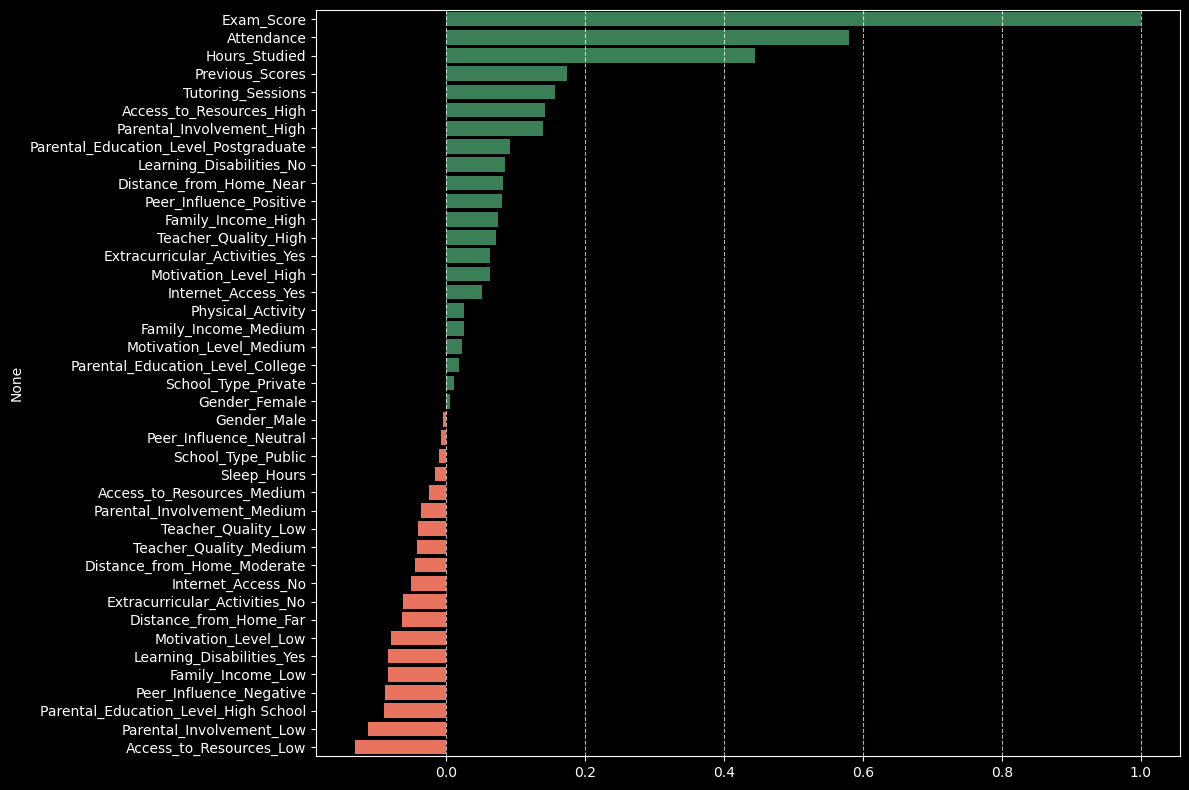

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_mtx = df_new.corr()
corr_score = corr_mtx["Exam_Score"].sort_values(ascending=False)

plt.figure(figsize=(12, 8), dpi=100)
sns.barplot(
    x = corr_score.values,
    y = corr_score.index,
    palette=["#2E8B57" if val > 0 else "#FF6347" for val in corr_score.values]
)


plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [33]:
corr_mtx['Exam_Score']

Hours_Studied                            0.445104
Attendance                               0.580259
Sleep_Hours                             -0.017171
Previous_Scores                          0.174283
Tutoring_Sessions                        0.156829
Physical_Activity                        0.025148
Parental_Involvement_High                0.139715
Parental_Involvement_Low                -0.112410
Parental_Involvement_Medium             -0.036191
Access_to_Resources_High                 0.141636
Access_to_Resources_Low                 -0.131276
Access_to_Resources_Medium              -0.024579
Extracurricular_Activities_No           -0.063063
Extracurricular_Activities_Yes           0.063063
Motivation_Level_High                    0.062872
Motivation_Level_Low                    -0.080061
Motivation_Level_Medium                  0.022508
Internet_Access_No                      -0.051124
Internet_Access_Yes                      0.051124
Family_Income_High                       0.073603


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'StudentPerformanceFactors.csv'
data = pd.read_csv(file_path)

# Convert relevant columns to numeric
numeric_cols = ['Exam_Score', 'Hours_Studied', 'Attendance', 'Previous_Scores',
                'Sleep_Hours', 'Physical_Activity', 'Tutoring_Sessions']
for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Visualization 1: Distribution of Exam Scores
plt.figure(figsize=(10, 6))
sns.histplot(data['Exam_Score'], kde=True, bins=20, color='blue')
plt.title('Distribution of Exam Scores', fontsize=16)
plt.xlabel('Exam Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Visualization 2: Correlation Heatmap for Numerical Features
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data[numerical_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.show()

# Visualization 3: Score Groups and Feature Comparison
# Define score groups: Low (<60), Medium (60-80), High (>80)
data['Score_Group'] = pd.cut(data['Exam_Score'], bins=[0, 60, 80, 100], labels=['Low', 'Medium', 'High'])

# Boxplot of Hours Studied for each Score Group
plt.figure(figsize=(10, 6))
sns.boxplot(x='Score_Group', y='Hours_Studied', data=data, palette='Set2')
plt.title('Hours Studied Across Score Groups', fontsize=16)
plt.xlabel('Score Group', fontsize=12)
plt.ylabel('Hours Studied', fontsize=12)
plt.show()

# Visualization 4: Boxplots for Categorical Features
# Gender and Exam Scores
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Exam_Score', data=data, palette='Set3')
plt.title('Exam Scores by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.show()

# School Type and Exam Scores
plt.figure(figsize=(10, 6))
sns.boxplot(x='School_Type', y='Exam_Score', data=data, palette='Set3')
plt.title('Exam Scores by School Type', fontsize=16)
plt.xlabel('School Type', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/path/to/StudentPerformanceFactors.csv'

### Linear Regression Inference

In [34]:
X = df_new.drop(columns = 'Exam_Score')
Y = df_new['Exam_Score']

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.25, random_state = 42)

model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

print(mean_squared_error(Y_test, Y_pred))

4.167171811554676


### Ridge Regression Inference

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


([<matplotlib.axis.XTick at 0x134550ad0>,
 [Text(0.5, 0, '1e-07'),
  Text(1.5, 0, '1e-06'),
  Text(2.5, 0, '1e-05'),
  Text(3.5, 0, '0.0001'),
  Text(4.5, 0, '0.001'),
  Text(5.5, 0, '0.01'),
  Text(6.5, 0, '0.1'),
  Text(7.5, 0, '1.0'),
  Text(8.5, 0, '10'),
  Text(9.5, 0, '100.0'),
  Text(10.5, 0, '1000.0'),
  Text(11.5, 0, '10000.0')])

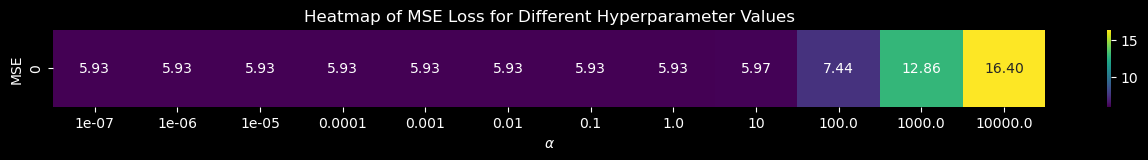

In [56]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import numpy as np

alphas = [10e-8, 10e-7, 10e-6, 10e-5, 10e-4, 10e-3, 10e-2, 10e-1, 10, 10e1, 10e2, 10e3]
results = []
for alpha in alphas:
    model = Ridge(alpha = alpha)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_val)
    results.append(mean_squared_error(Y_val, Y_pred))

plt.figure(figsize = (16, 1))
sns.heatmap(np.array(results).reshape(1, len(results)), annot = True, fmt = '.2f', cmap = 'viridis')
plt.title("Heatmap of MSE Loss for Different Hyperparameter Values in Ridge Regression")
plt.xlabel(r'$\alpha$')
plt.xticks(ticks = np.arange(len(alphas)) + 0.5, labels = alphas)

In [57]:
model = Ridge(alpha = .0001)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

mean_squared_error(Y_test, Y_pred)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


4.167171717669862

### Lasso Regression Inference

([<matplotlib.axis.XTick at 0x130e60c80>,
 [Text(0.5, 0, '1e-07'),
  Text(1.5, 0, '1e-06'),
  Text(2.5, 0, '1e-05'),
  Text(3.5, 0, '0.0001'),
  Text(4.5, 0, '0.001'),
  Text(5.5, 0, '0.01'),
  Text(6.5, 0, '0.1'),
  Text(7.5, 0, '1.0'),
  Text(8.5, 0, '10'),
  Text(9.5, 0, '100.0'),
  Text(10.5, 0, '1000.0'),
  Text(11.5, 0, '10000.0')])

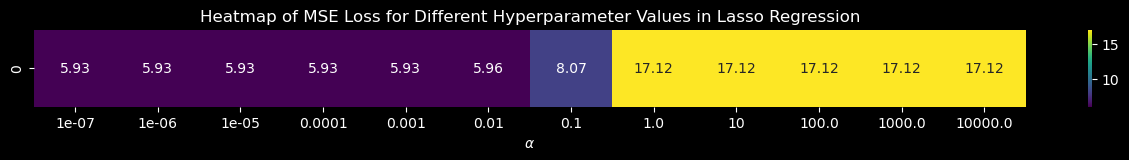

In [59]:
from sklearn.linear_model import Lasso

results = []
for alpha in alphas:
    model = Lasso(alpha = alpha)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_val)
    results.append(mean_squared_error(Y_val, Y_pred))

plt.figure(figsize = (16, 1))
sns.heatmap(np.array(results).reshape(1, len(results)), annot = True, fmt = '.2f', cmap = 'viridis')
plt.title("Heatmap of MSE Loss for Different Hyperparameter Values in Lasso Regression")
plt.xlabel(r'$\alpha$')
plt.xticks(ticks = np.arange(len(alphas)) + 0.5, labels = alphas)

In [60]:
model = Lasso(alpha = 1e-05)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

mean_squared_error(Y_test, Y_pred)

4.167166619228075

### Decision Tree Inference

([<matplotlib.axis.XTick at 0x13549be90>,
 [Text(0.5, 0, '2'), Text(1.5, 0, '5'), Text(2.5, 0, '7'), Text(3.5, 0, '10')])

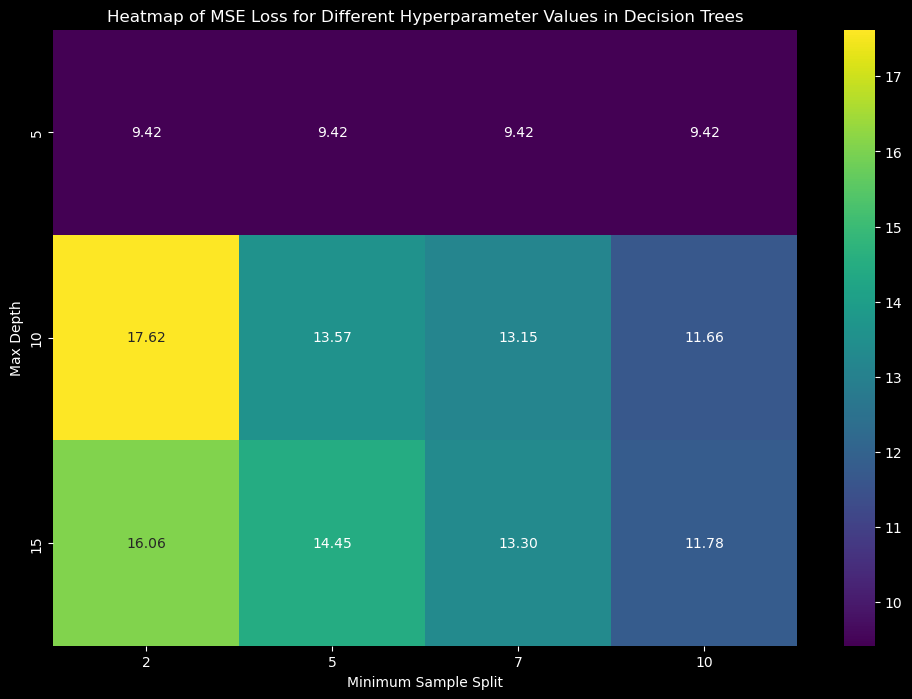

In [66]:
from sklearn.tree import DecisionTreeRegressor

results = np.zeros((3, 4))
dt_params = {'max_depth' : [5, 10, 15], 'min_samples_split': [2, 5, 7, 10]}

for i, max_depth in enumerate(dt_params['max_depth']):
    for j, min_samples_split in enumerate(dt_params['min_samples_split']):
        model = DecisionTreeRegressor(max_depth = max_depth, min_samples_split = min_samples_split)
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_val)

        results[i, j] = mean_squared_error(Y_pred, Y_val)

plt.figure(figsize = (12, 8))
sns.heatmap(results, annot = True, fmt = '.2f', cmap = 'viridis')
plt.title("Heatmap of MSE Loss for Different Hyperparameter Values in Decision Trees")
plt.ylabel('Max Depth')
plt.xlabel('Minimum Sample Split')
plt.yticks(ticks = np.arange(len(dt_params['max_depth'])) + 0.5, labels = dt_params['max_depth'])
plt.xticks(ticks = np.arange(len(dt_params['min_samples_split'])) + 0.5, labels = dt_params['min_samples_split'])


In [67]:
model = DecisionTreeRegressor(max_depth = 5, min_samples_split = 2)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
mean_squared_error(Y_pred, Y_test)

7.55258530332906

### Random Forest Inference

([<matplotlib.axis.XTick at 0x1353aed80>,
 [Text(0.5, 0, '2'), Text(1.5, 0, '5'), Text(2.5, 0, '7'), Text(3.5, 0, '10')])

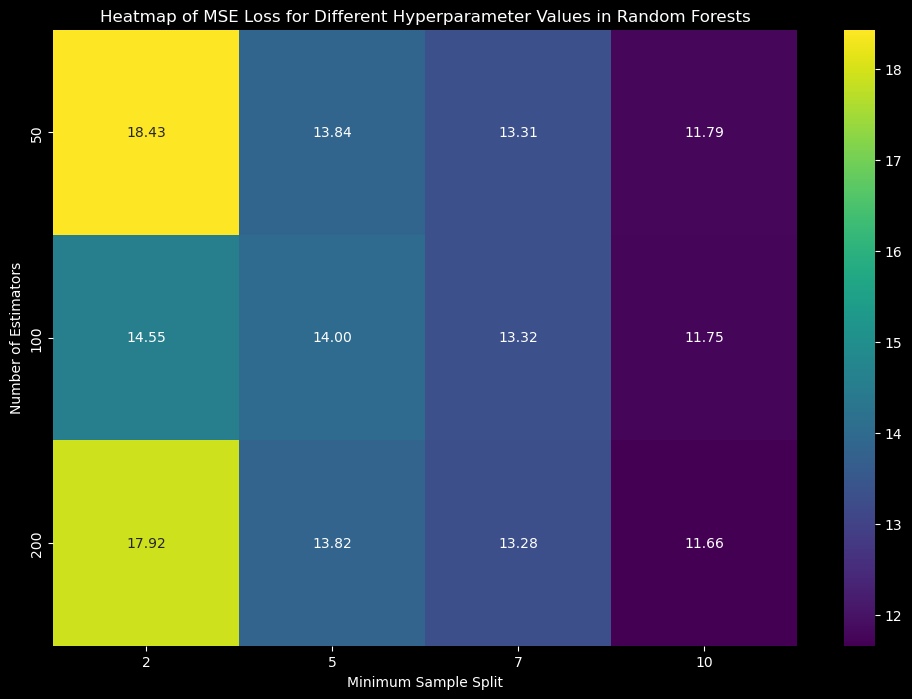

In [69]:
from sklearn.ensemble import RandomForestRegressor

results = np.zeros((3, 4))
dt_params = {'n_estimators' : [50, 100, 200], 'min_samples_split': [2, 5, 7, 10]}

for i, n_estimators in enumerate(dt_params['n_estimators']):
    for j, min_samples_split in enumerate(dt_params['min_samples_split']):
        model = DecisionTreeRegressor(max_depth = max_depth, min_samples_split = min_samples_split)
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_val)

        results[i, j] = mean_squared_error(Y_pred, Y_val)

plt.figure(figsize = (12, 8))
sns.heatmap(results, annot = True, fmt = '.2f', cmap = 'viridis')
plt.title("Heatmap of MSE Loss for Different Hyperparameter Values in Random Forests")
plt.ylabel('Number of Estimators')
plt.xlabel('Minimum Sample Split')
plt.yticks(ticks = np.arange(len(dt_params['n_estimators'])) + 0.5, labels = dt_params['n_estimators'])
plt.xticks(ticks = np.arange(len(dt_params['min_samples_split'])) + 0.5, labels = dt_params['min_samples_split'])

In [72]:
model = RandomForestRegressor(n_estimators = 200, min_samples_split = 10)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
mean_squared_error(Y_pred, Y_test)

5.760325712455692